## Step 0: Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
plt.rcParams.update({'figure.figsize':(18,5), 'figure.dpi':120})

In [2]:
link = 'https://docs.google.com/spreadsheets/d/1C2r33I37HXK4yHwaw3axk7zwMQXfweZf/edit?usp=sharing&ouid=105153314851673119826&rtpof=true&sd=true'
path =  'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_excel(path)

## Step 1: Clean data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_ID            205 non-null    int64 
 1   symboling         205 non-null    int64 
 2   CarName           205 non-null    object
 3   fueltype          205 non-null    object
 4   aspiration        205 non-null    object
 5   doornumber        205 non-null    object
 6   carbody           205 non-null    object
 7   drivewheel        205 non-null    object
 8   enginelocation    205 non-null    object
 9   wheelbase         205 non-null    int64 
 10  carlength         205 non-null    int64 
 11  carwidth          205 non-null    int64 
 12  carheight         205 non-null    int64 
 13  curbweight        205 non-null    int64 
 14  enginetype        205 non-null    object
 15  cylindernumber    205 non-null    object
 16  enginesize        205 non-null    int64 
 17  fuelsystem      

In [4]:
#Tạo cột CarCompany từ cột CarName và kiểm tra tên hãng xe:
CarCompany = df['CarName'].str.split().str[0]
CarCompany.value_counts()


toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [5]:
#Xóa cột CarName và car_ID, thêm cột CarCompany:
df.insert(3,"CarCompany",CarCompany)
df.drop(['CarName'],axis=1,inplace=True)
df.drop(['car_ID'],axis=1,inplace=True)
df.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,886,1688,...,130,mpfi,347,268,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,886,1688,...,130,mpfi,347,268,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,945,1712,...,152,mpfi,268,347,9,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,998,1766,...,109,mpfi,319,34,10,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,994,1766,...,136,mpfi,319,34,8,115,5500,18,22,17450


In [6]:
# Sửa lại tên các công ty lỗi:
replacements = {'toyouta': 'toyota',
                'maxda': 'mazda',
                'vokswagen': 'volkswagen',
                'porcshce': 'porsche',
                'Nissan': 'nissan',
                'vw':'volkswagen'}
df['CarCompany'] = df['CarCompany'].replace(replacements)

In [7]:
#Kiểm tra các cột có định dạng 'object':
for i in  df.columns:
      if df[i].dtype == 'object':
        print(i +": ")
        print(df[i].value_counts())
        print()

CarCompany: 
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarCompany, dtype: int64

fueltype: 
gas       185
diesel     20
Name: fueltype, dtype: int64

aspiration: 
std      168
turbo     37
Name: aspiration, dtype: int64

doornumber: 
four    115
two      90
Name: doornumber, dtype: int64

carbody: 
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

drivewheel: 
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

enginelocation: 
front    202
rear       3
Name: enginelocation, dtype: int64

enginetype: 
ohc      148
ohcf      15
ohcv      13
dohc      12

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02
mean,0.834146,923.687805,1597.502439,616.185366,491.195122,2555.565854,126.907317,316.863415,329.492683,74.565854,104.117073,5125.121951,25.219512,30.751220,1.024690e+05
std,1.245307,229.283389,471.805207,156.566608,146.569969,520.680204,41.642693,68.658153,429.105243,99.368850,39.544167,476.985643,6.542142,6.886443,1.246484e+06
min,-2.000000,93.000000,150.000000,64.000000,51.000000,1488.000000,61.000000,35.000000,28.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5.118000e+03
25%,0.000000,945.000000,1624.000000,638.000000,508.000000,2145.000000,97.000000,305.000000,268.000000,9.000000,70.000000,4800.000000,19.000000,25.000000,7.788000e+03
50%,1.000000,963.000000,1724.000000,654.000000,541.000000,2414.000000,120.000000,327.000000,319.000000,85.000000,95.000000,5200.000000,24.000000,30.000000,1.059500e+04
75%,2.000000,1004.000000,1803.000000,665.000000,555.000000,2935.000000,141.000000,354.000000,339.000000,94.000000,116.000000,5500.000000,30.000000,34.000000,1.655800e+04
max,3.000000,1209.000000,2081.000000,723.000000,598.000000,4066.000000,326.000000,394.000000,3255.000000,941.000000,288.000000,6600.000000,49.000000,54.000000,1.785917e+07


1. Cột price cần kiểm tra vì giá trị giữa min và max có sự khác biệt khá lớn(có outlier)
2. Các cột wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio cần kiểm tra vì có sự chênh lệch rất lớn giữa giá trị min và giá trị max( nguyên nhân có thể do nhập sai hoặc đơn vị không đồng nhất)

In [9]:
#Cập nhật lại giá sau khi tìm hiểu như sau:
df.loc[df['price'] == 17859167, 'price'] = 17859
df.loc[df['price'] == 314005, 'price'] = 31400
df.loc[df['wheelbase'] >= 866, 'wheelbase'] = df.loc[df['wheelbase'] >= 866, 'wheelbase'] / 10
df.loc[df['carlength'] >= 1411, 'carlength'] = df.loc[df['carlength'] >= 1411, 'carlength'] / 10
df.loc[df['carwidth'] >= 603, 'carwidth'] = df.loc[df['carwidth'] >= 603, 'carwidth'] / 10
df.loc[df['carheight'] >= 478, 'carheight'] = df.loc[df['carheight'] >= 478, 'carheight'] / 10
df.loc[df['boreratio'] < 254, 'boreratio'] = df.loc[df['boreratio'] < 254, 'boreratio'] / 10
df.loc[df['boreratio'] >= 254, 'boreratio'] = df.loc[df['boreratio'] >= 254, 'boreratio'] / 100
df.loc[df['stroke'] <= 39, 'stroke'] = df.loc[df['stroke'] <= 39, 'stroke'] / 10
df.loc[(df['stroke'] > 39) & (df['stroke'] <= 417), 'stroke'] = df.loc[(df['stroke'] > 39) & (df['stroke'] <= 417), 'stroke'] / 100
df.loc[df['stroke'] > 417, 'stroke'] = df.loc[df['stroke'] > 417, 'stroke'] / 1000
df.loc[(df['compressionratio'] > 23) & (df['compressionratio'] <= 227), 'compressionratio'] = df.loc[(df['compressionratio'] > 23) & (df['compressionratio'] <= 227), 'compressionratio'] / 10
df.loc[df['compressionratio'] > 227, 'compressionratio'] = df.loc[df['compressionratio'] > 227, 'compressionratio'] / 100

In [10]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,14059.619512
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,10930.710417
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,89165.000000


## Step 2: EDA

count      205.000000
mean     14059.619512
std      10930.710417
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16558.000000
max      89165.000000
Name: price, dtype: float64

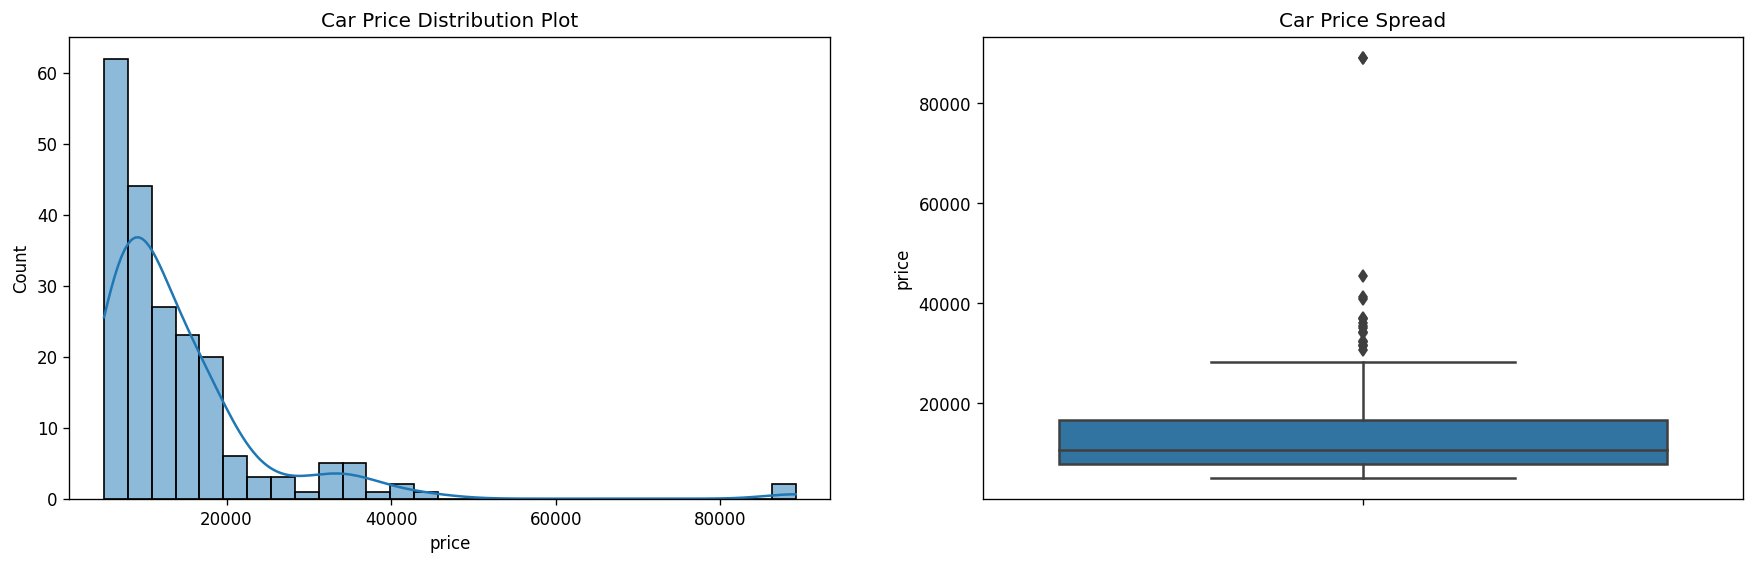

In [11]:
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(df.price, kde=True)

df.price.describe()

Từ biểu đồ phân bố ta có thể thấy rằng 85% xe có mức giá dưới 16.5k, giá trị trung bình  1 chiếc xe là 14k, chiếc xe đắt nhất có giá 89k, chiếc xe rẻ nhất có giá 5.1k

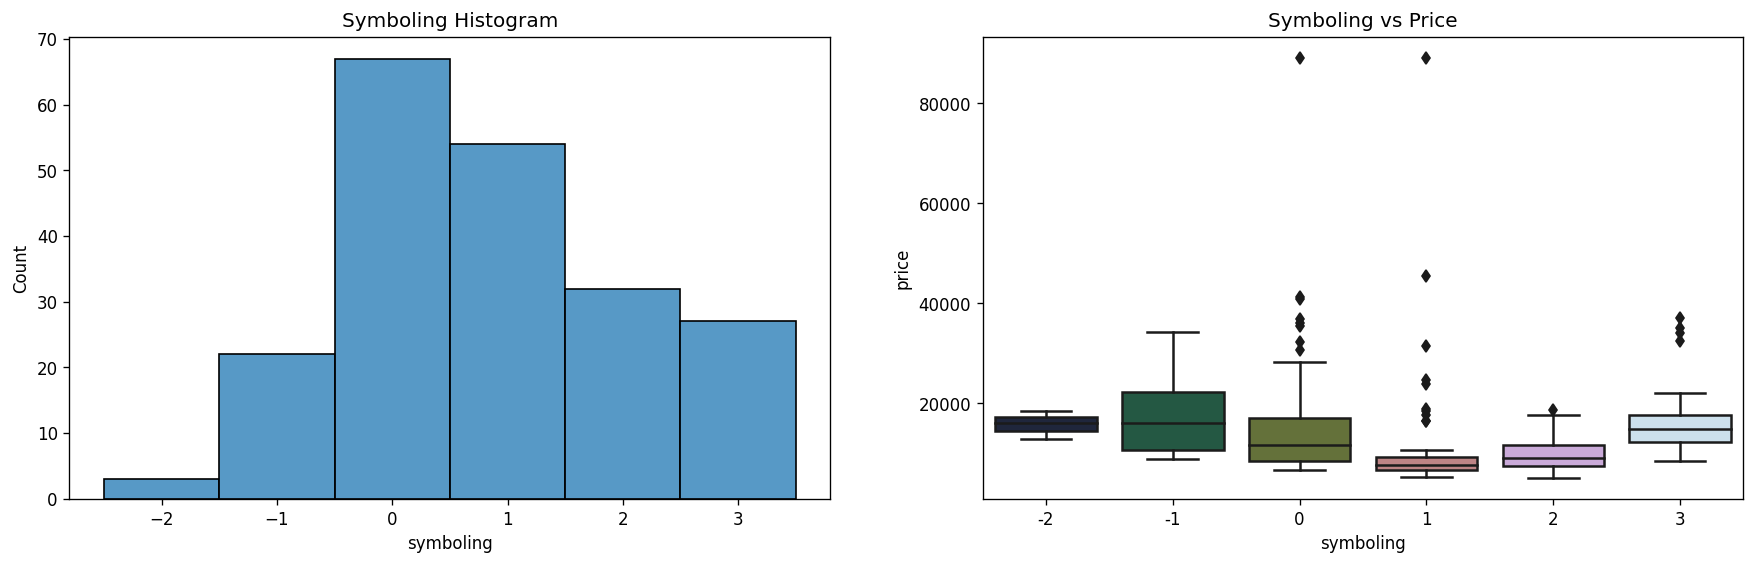

In [12]:
plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.histplot(df.symboling,bins = 6, discrete=True)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

1.   Những xe với symboling là 0 và 1 có số lượng sản xuất nhiều nhất.
2.   Xe với symboling = -1 có mức giá cao hơn so với các xe còn lại có thể được giải thích là do tính rủi ro bảo hiểm là khá an toàn.
3.   Xe ở mức -2 symboling được sản xuất rất ít và không có xe ở mức -3 được sản xuất.
4.   Xe ở mức +1 symboling có mức giá thấp nhất.



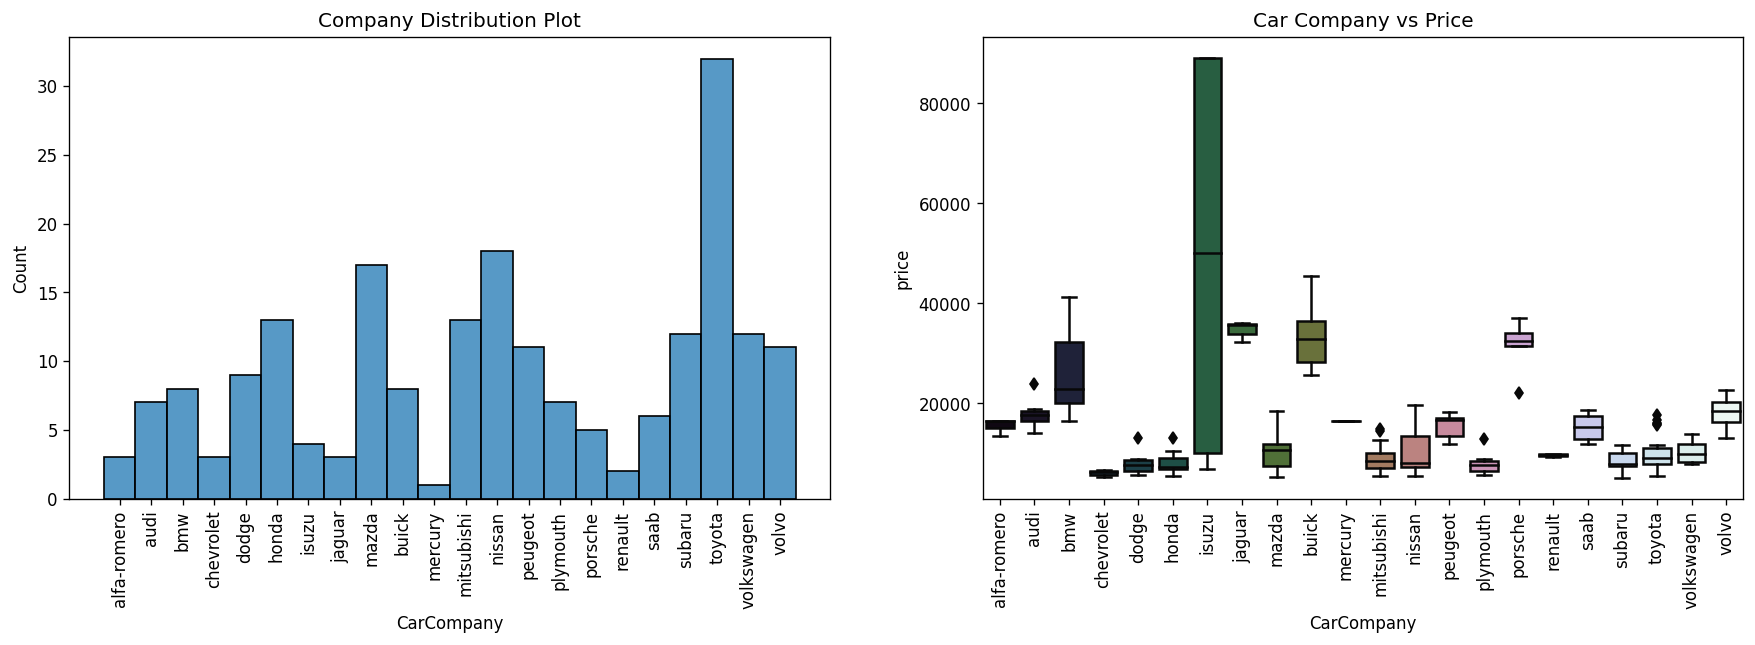

In [13]:
plt.subplot(1,2,1)
plt.title('Company Distribution Plot')
sns.histplot(df.CarCompany, discrete=True)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Car Company vs Price')
sns.boxplot(x=df.CarCompany, y=df.price, palette=("cubehelix"))
plt.xticks(rotation=90)
plt.show()

1. Toyota là hãng có số lượng mẫu xe nhiều nhất nhưng giá xe ở mức thấp (trung bình giá xe ở mức dưới 10k)
2. Isuzu là hãng xe đắt nhất (trung bình giá xe ở mức 50k) nhưng số lượng mẫu xe ít

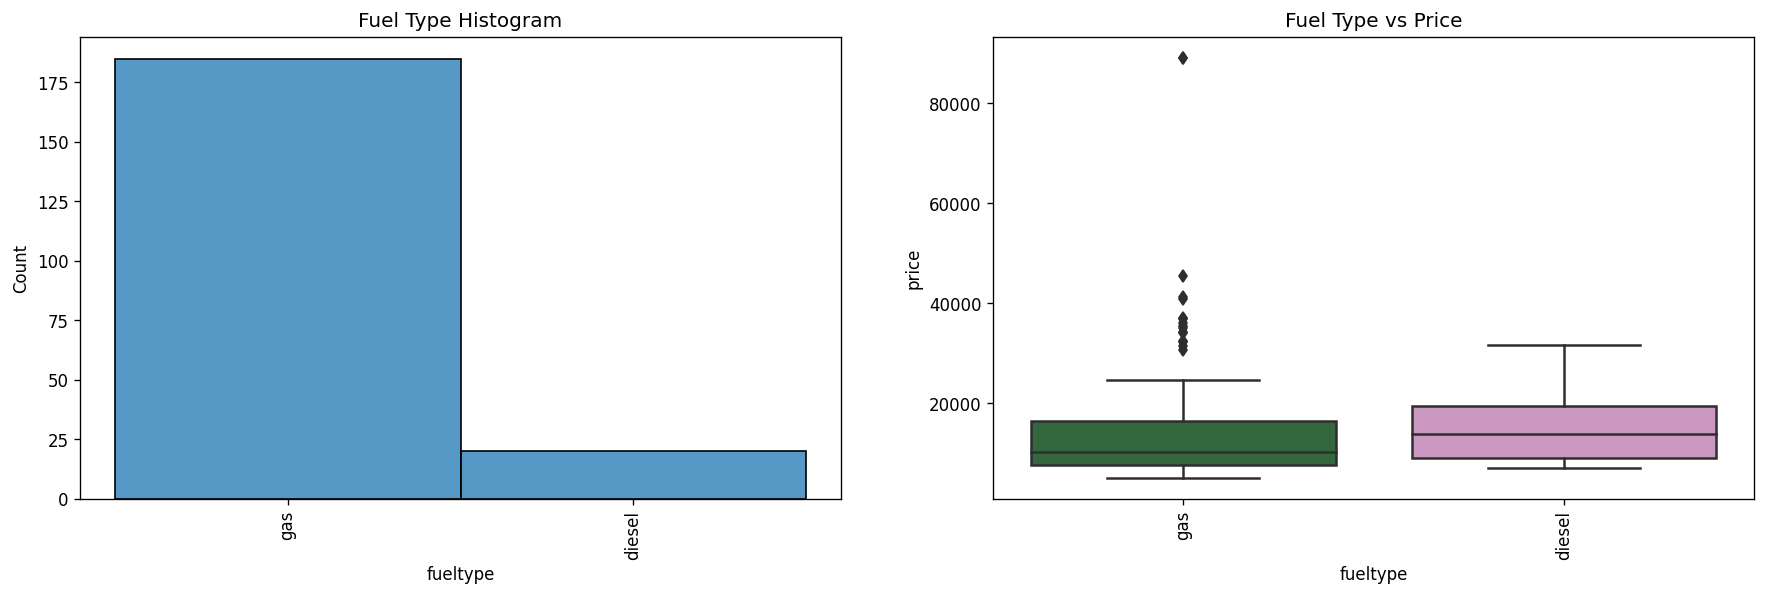

In [14]:
plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.histplot(df.fueltype, discrete=True)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=df.fueltype, y=df.price, palette=("cubehelix"))
plt.xticks(rotation=90)
plt.show()

1. Xe dùng gas được sản xuất nhiều hơn xe dùng dầu diesel
2. Xe dùng dầu diesel có giá cao hơn xe dùng gas

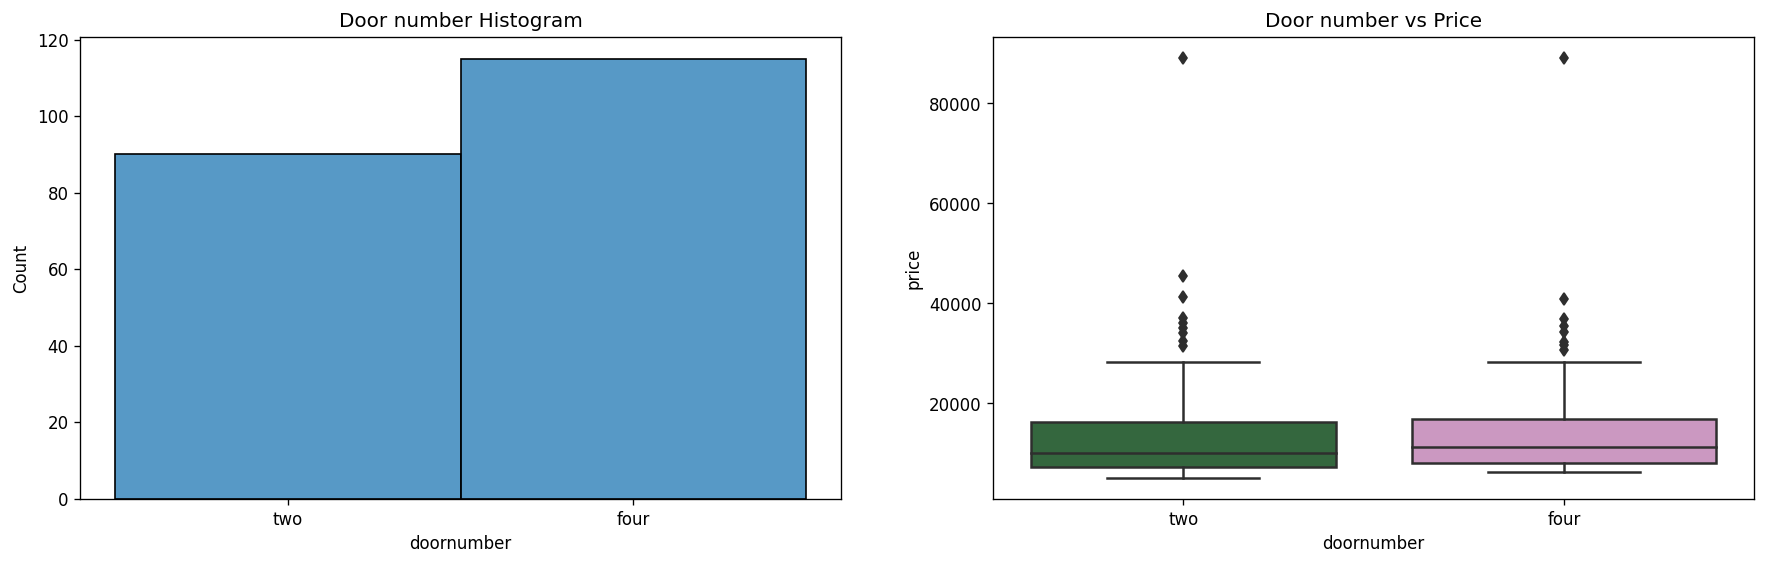

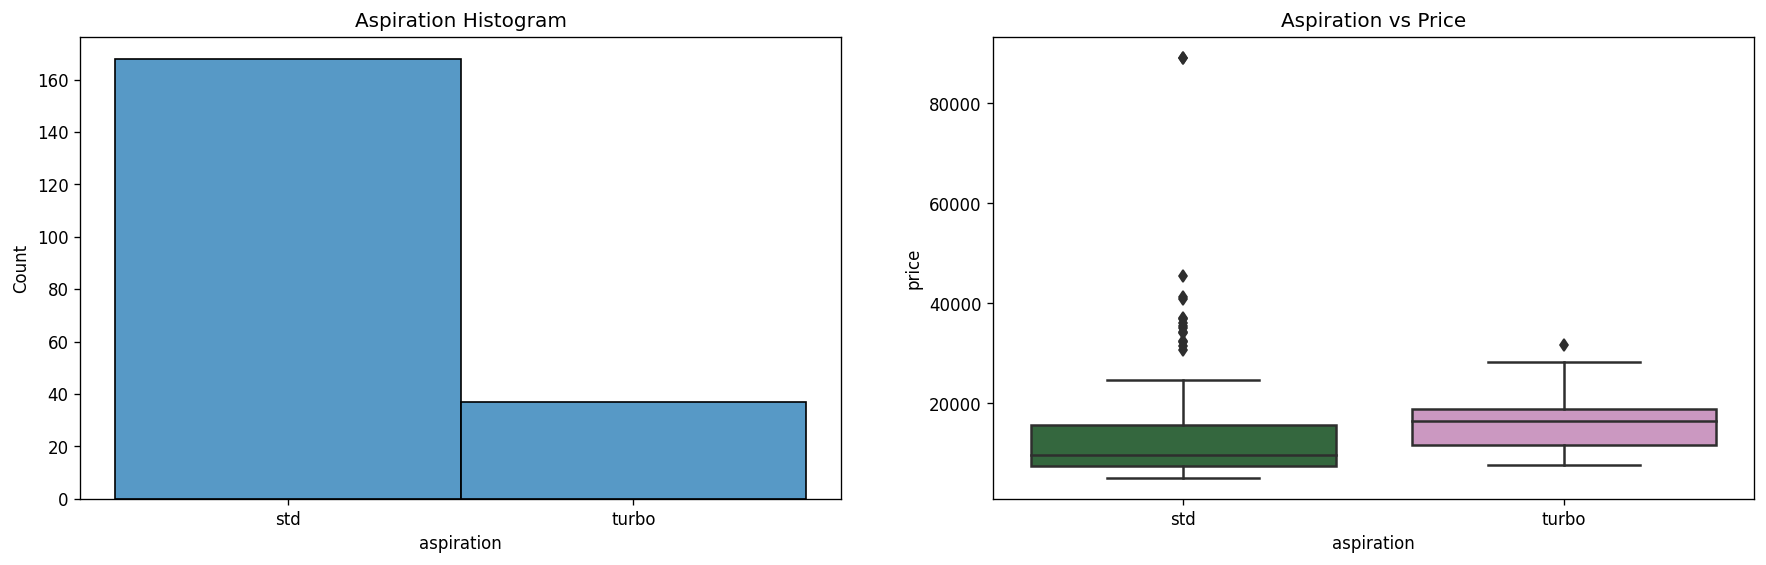

In [15]:
plt.subplot(1,2,1)
plt.title('Door number Histogram')
sns.histplot(df.doornumber, discrete=True)

plt.subplot(1,2,2)
plt.title('Door number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("cubehelix"))

plt.show()

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.histplot(df.aspiration, discrete=True)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("cubehelix"))

plt.show()

1. Mẫu xe 4 cửa phổ biến hơn mẫu 2 cửa. Số lượng cửa không ảnh hưởng tới giá ô tô.
2. Mẫu xe sử dụng std aspiration phổ biến hơn mẫu xe sử dụng turbo.
3. Giá của mẫu xe sử dụng turbo cao hơn xe sử dụng std

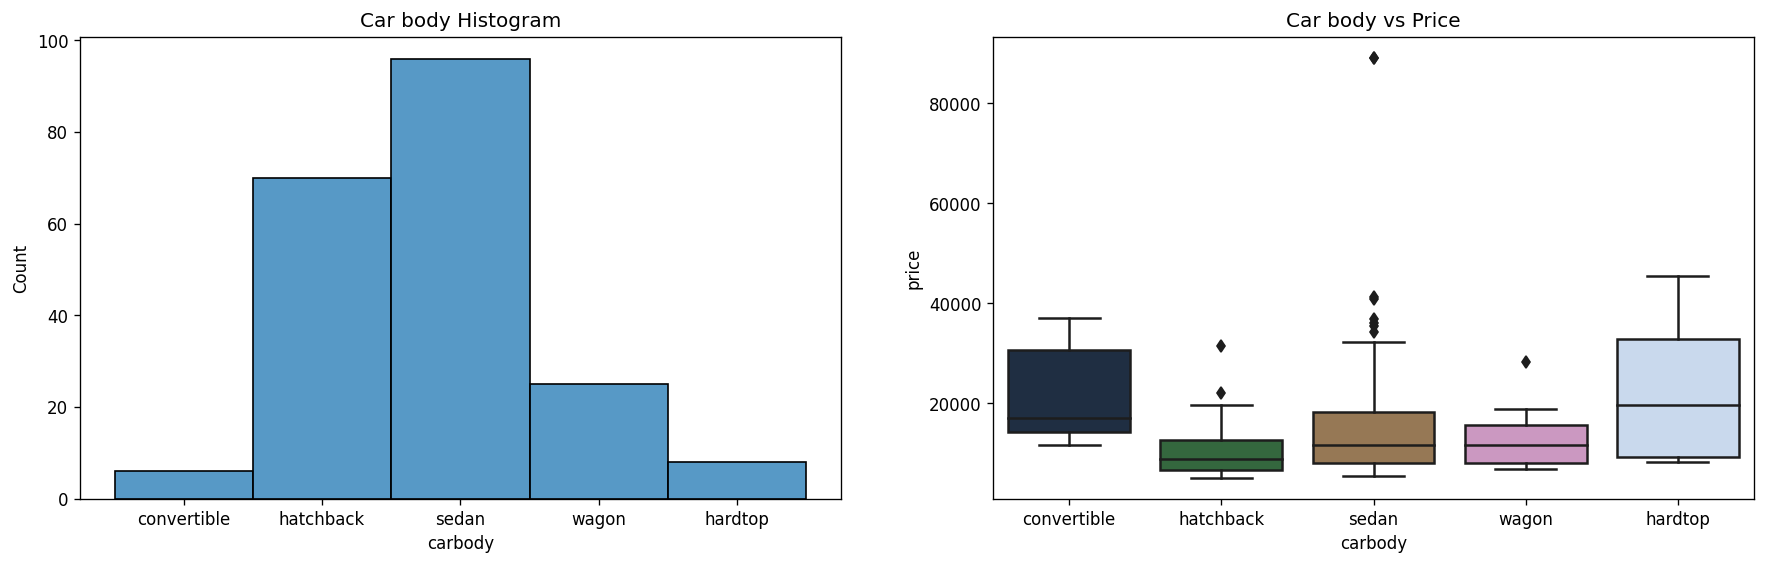

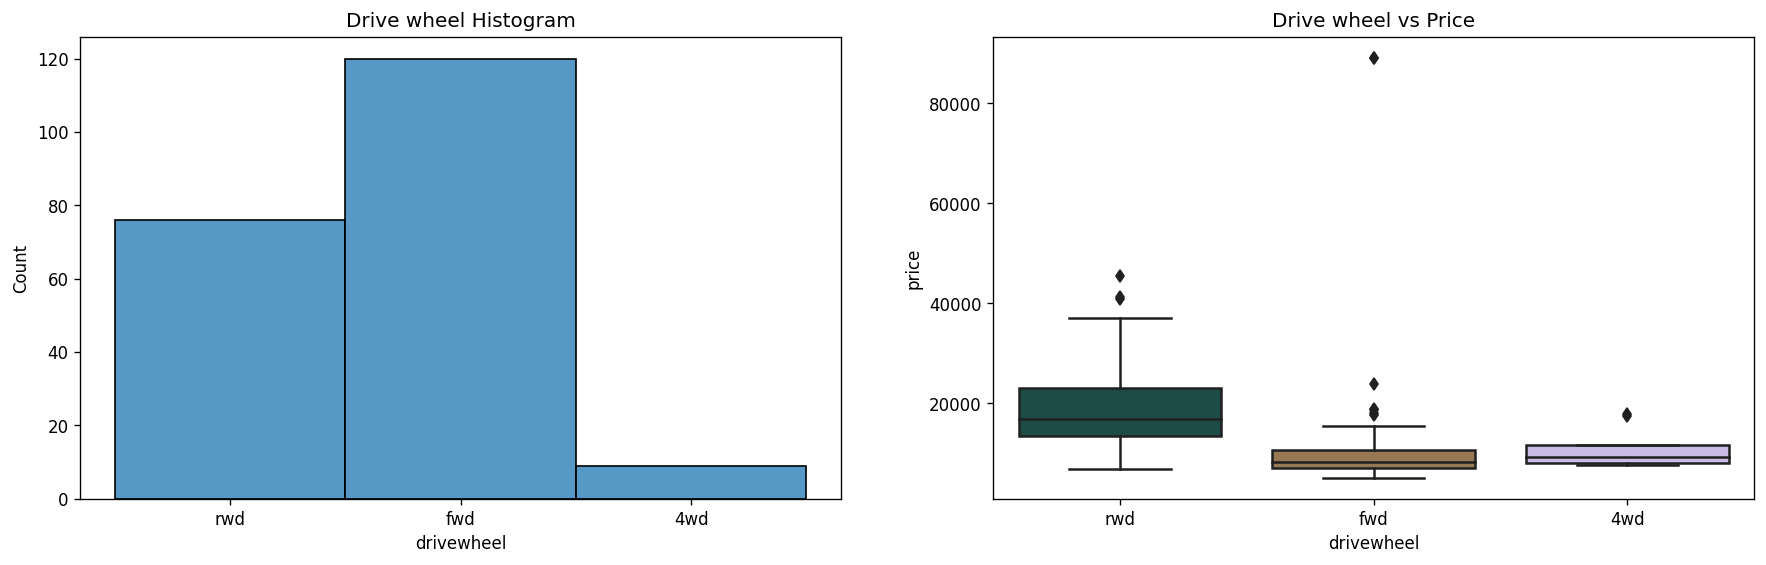

In [16]:
plt.subplot(1,2,1)
plt.title('Car body Histogram')
sns.histplot(df.carbody, discrete=True)

plt.subplot(1,2,2)
plt.title('Car body vs Price')
sns.boxplot(x=df.carbody, y=df.price, palette=("cubehelix"))

plt.show()

plt.subplot(1,2,1)
plt.title('Drive wheel Histogram')
sns.histplot(df.drivewheel, discrete=True)

plt.subplot(1,2,2)
plt.title('Drive wheel vs Price')
sns.boxplot(x=df.drivewheel, y=df.price, palette=("cubehelix"))

plt.show()

1. Mẫu xe có body sedan và hatchback được sử dụng phổ biến nhất
2. Mẫu xe có body convertible và hardtop có giá bình quân cao hơn các mẫu xe còn lại
3. Mẫu xe sử dụng hệ thống drivewheel fwd phổ biến nhất
4. Mẫu xe sử dụng rwd có giá bình quân cao hơn 2 mẫu còn lại

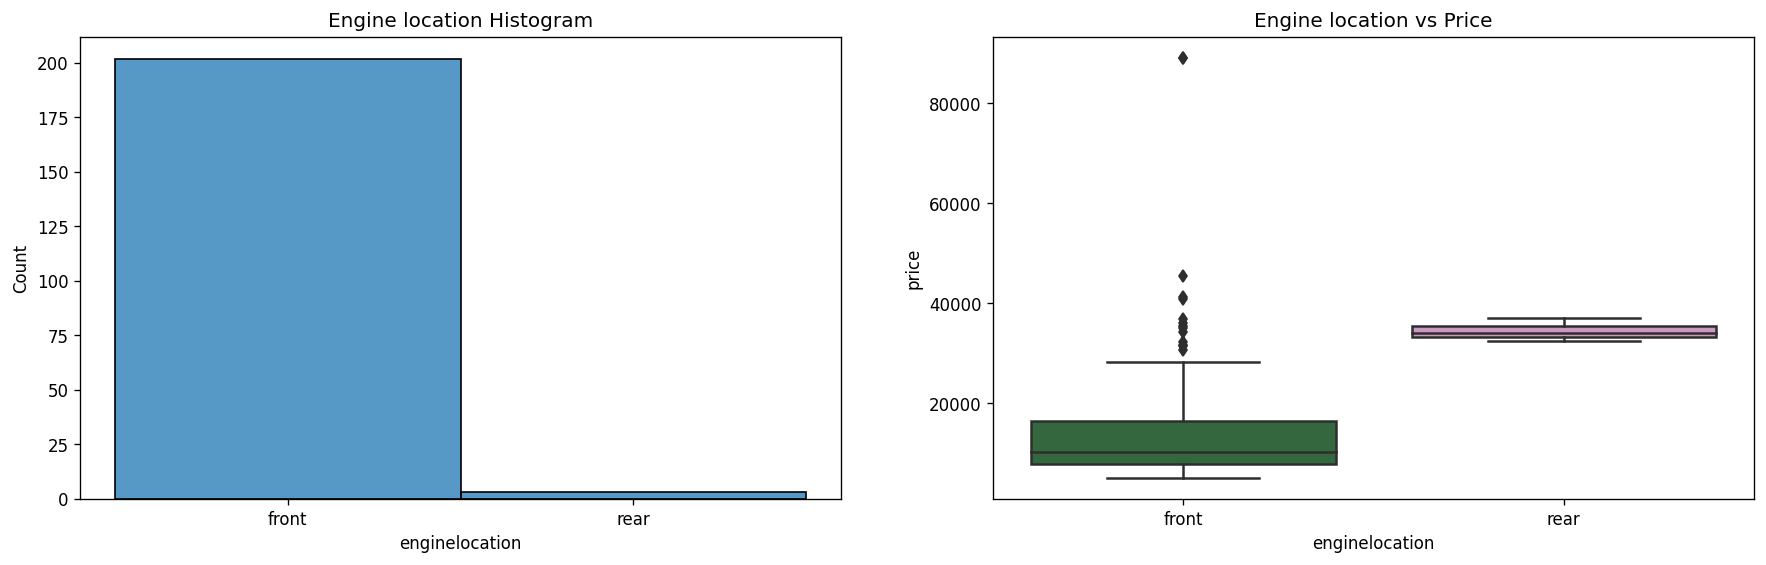

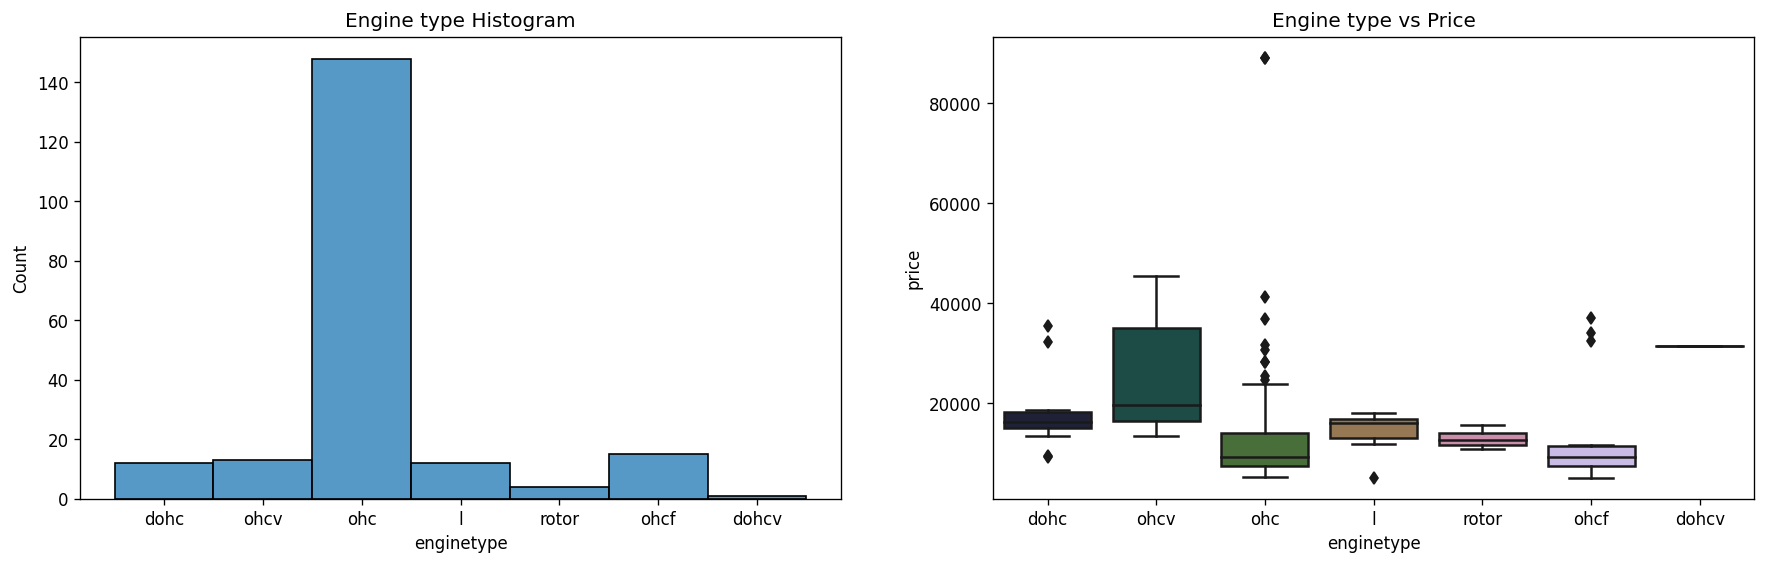

In [17]:
plt.subplot(1,2,1)
plt.title('Engine location Histogram')
sns.histplot(df.enginelocation, discrete=True)

plt.subplot(1,2,2)
plt.title('Engine location vs Price')
sns.boxplot(x=df.enginelocation, y=df.price, palette=("cubehelix"))

plt.show()

plt.subplot(1,2,1)
plt.title('Engine type Histogram')
sns.histplot(df.enginetype, discrete=True)

plt.subplot(1,2,2)
plt.title('Engine type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("cubehelix"))

plt.show()

1. Mẫu xe front engine location phổ biến hơn cả và có giá thành rẻ hơn so với mẫu rear
2. Mẫu xe sử dụng engine type ohc phổ biến nhất và có giá thành rẻ nhất


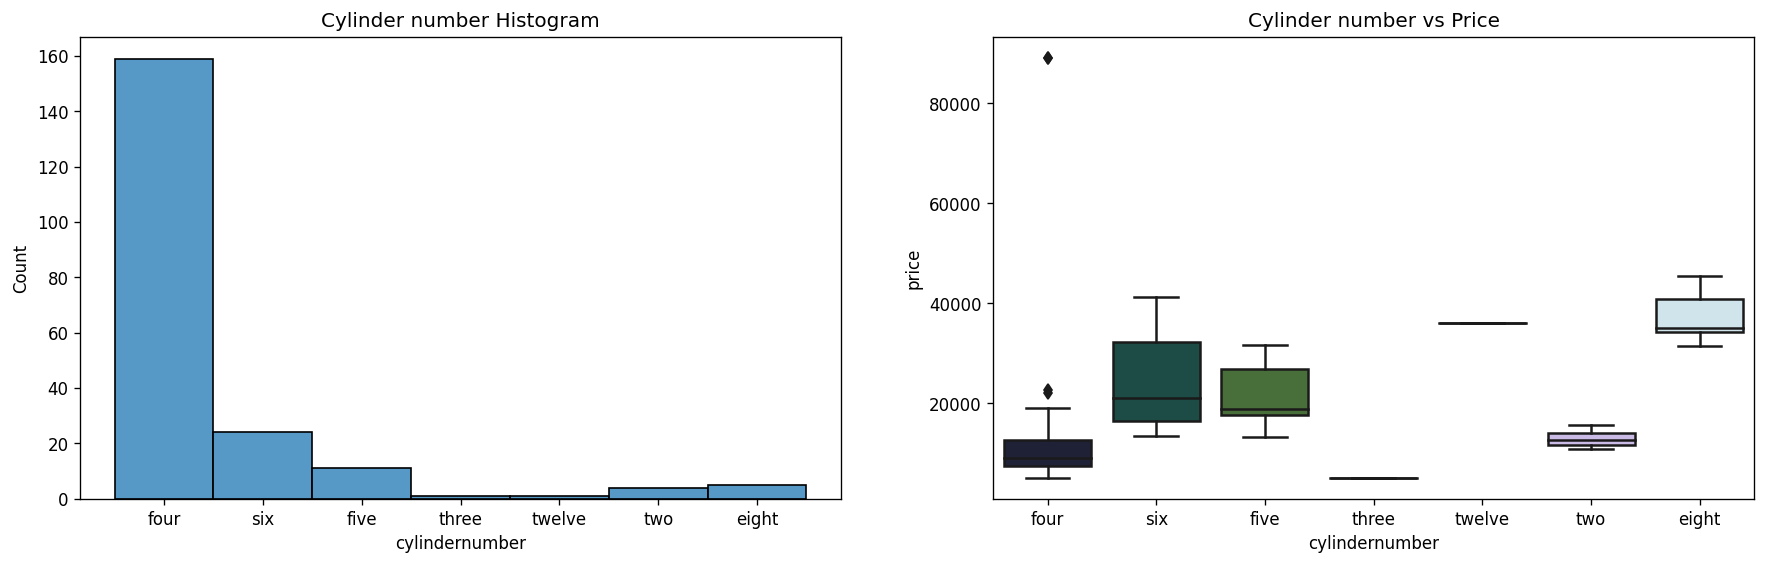

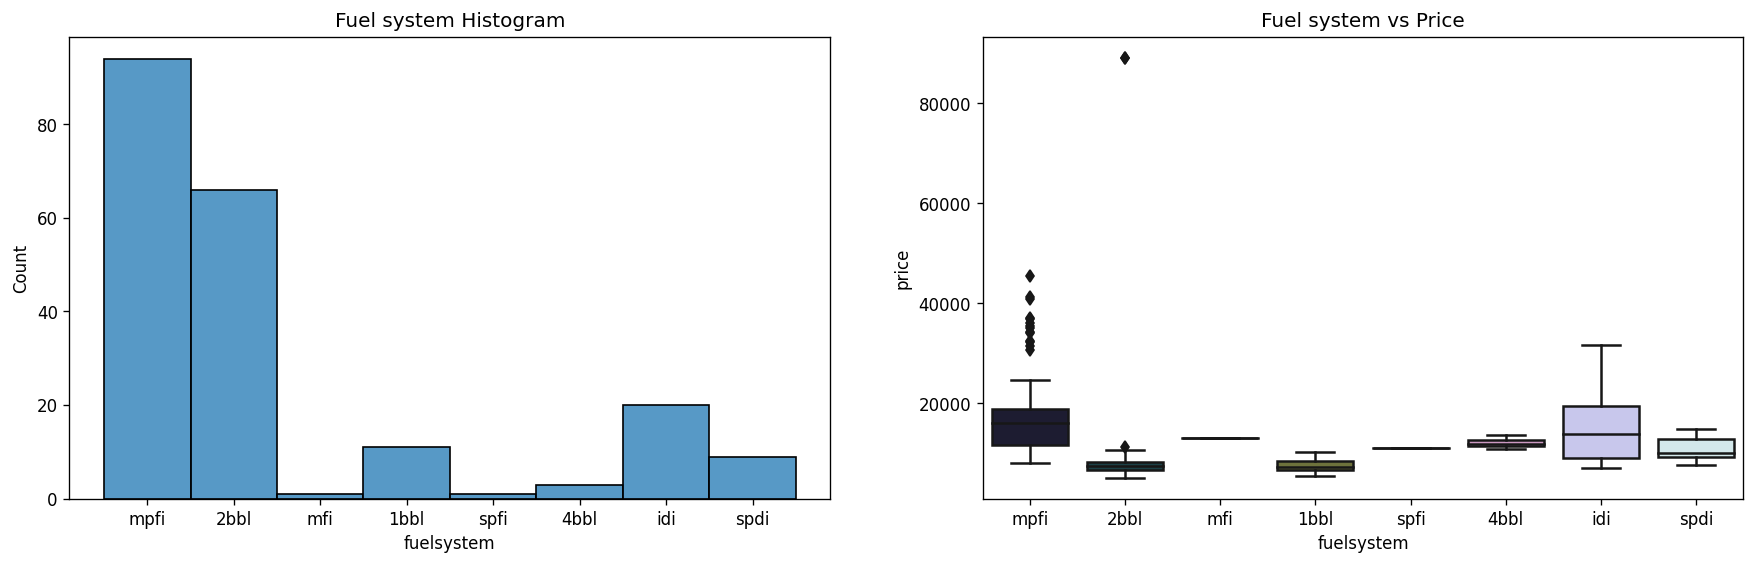

In [18]:
plt.subplot(1,2,1)
plt.title('Cylinder number Histogram')
sns.histplot(df.cylindernumber, discrete=True)

plt.subplot(1,2,2)
plt.title('Cylinder number vs Price')
sns.boxplot(x=df.cylindernumber, y=df.price, palette=("cubehelix"))

plt.show()

plt.subplot(1,2,1)
plt.title('Fuel system Histogram')
sns.histplot(df.fuelsystem, discrete=True)

plt.subplot(1,2,2)
plt.title('Fuel system vs Price')
sns.boxplot(x=df.fuelsystem, y=df.price, palette=("cubehelix"))

plt.show()

1. 4 cylinder được sử dụng phổ biến nhất
2. 8 cylinder có khoảng giá cao nhất
3. 2 mẫu fuel system được sử dụng nhiều nhất là mpfi và 2bbl


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


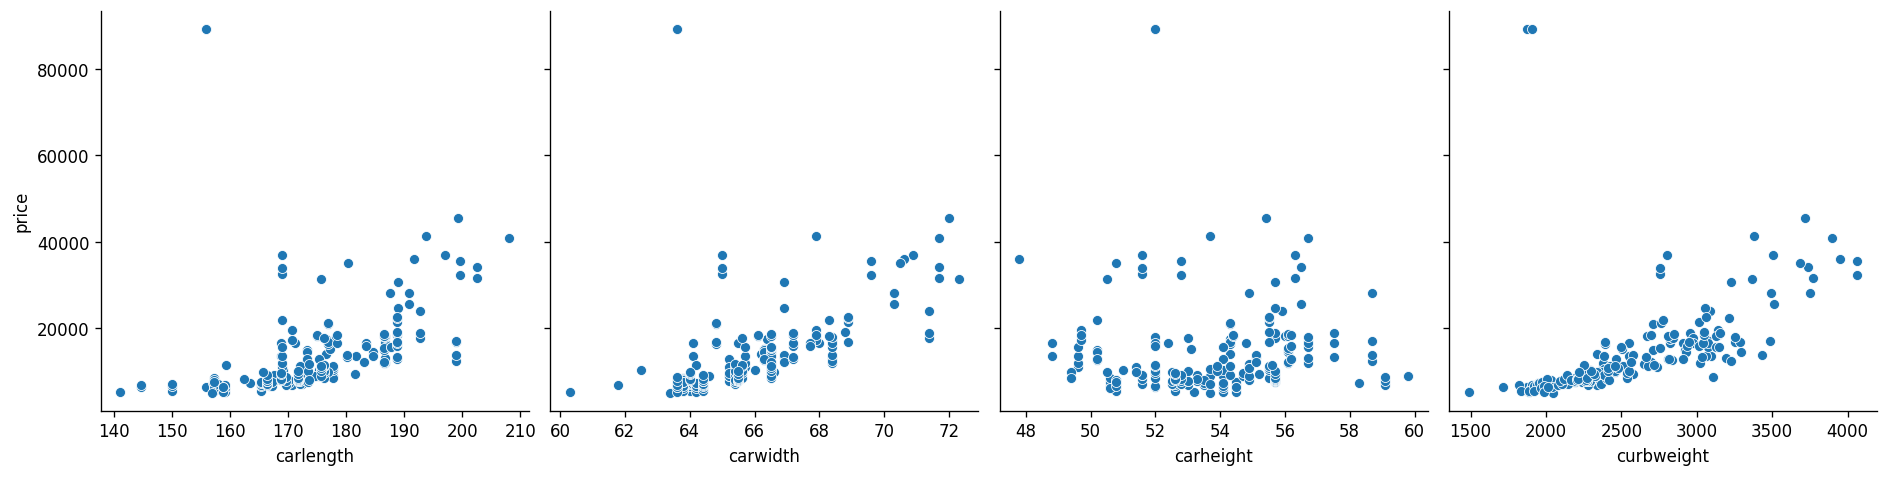

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


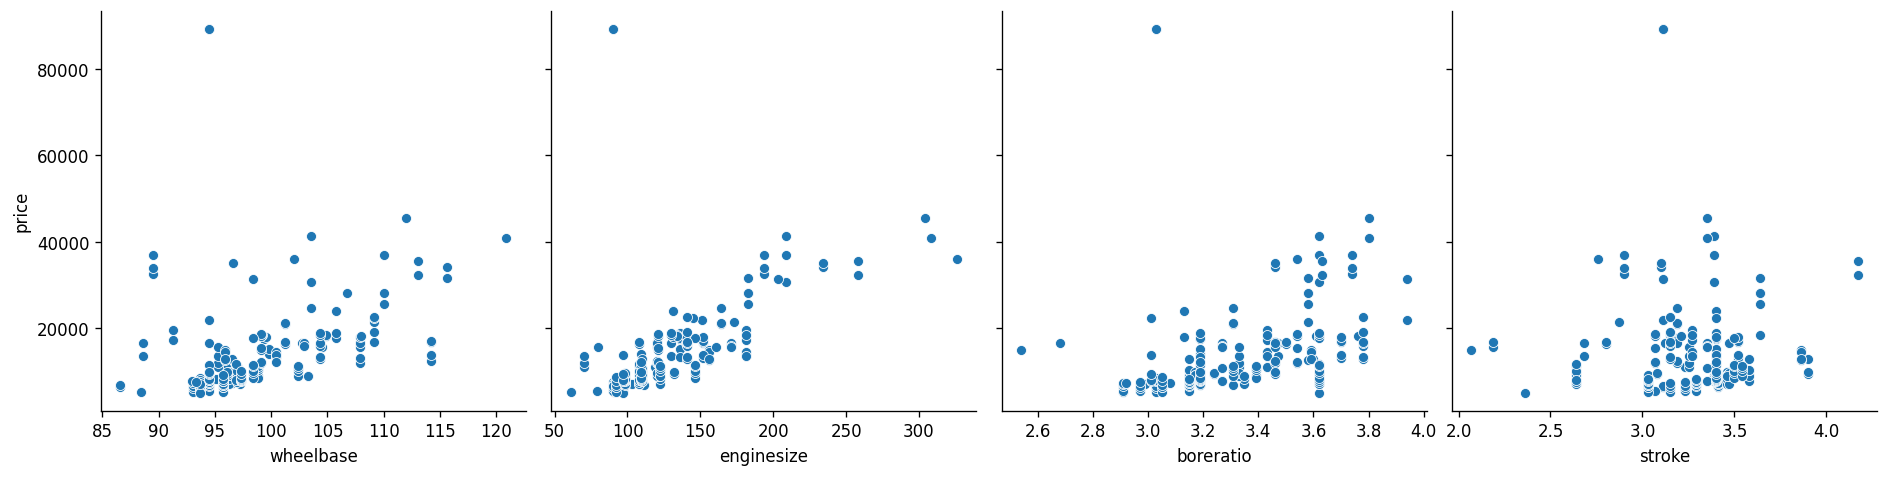

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


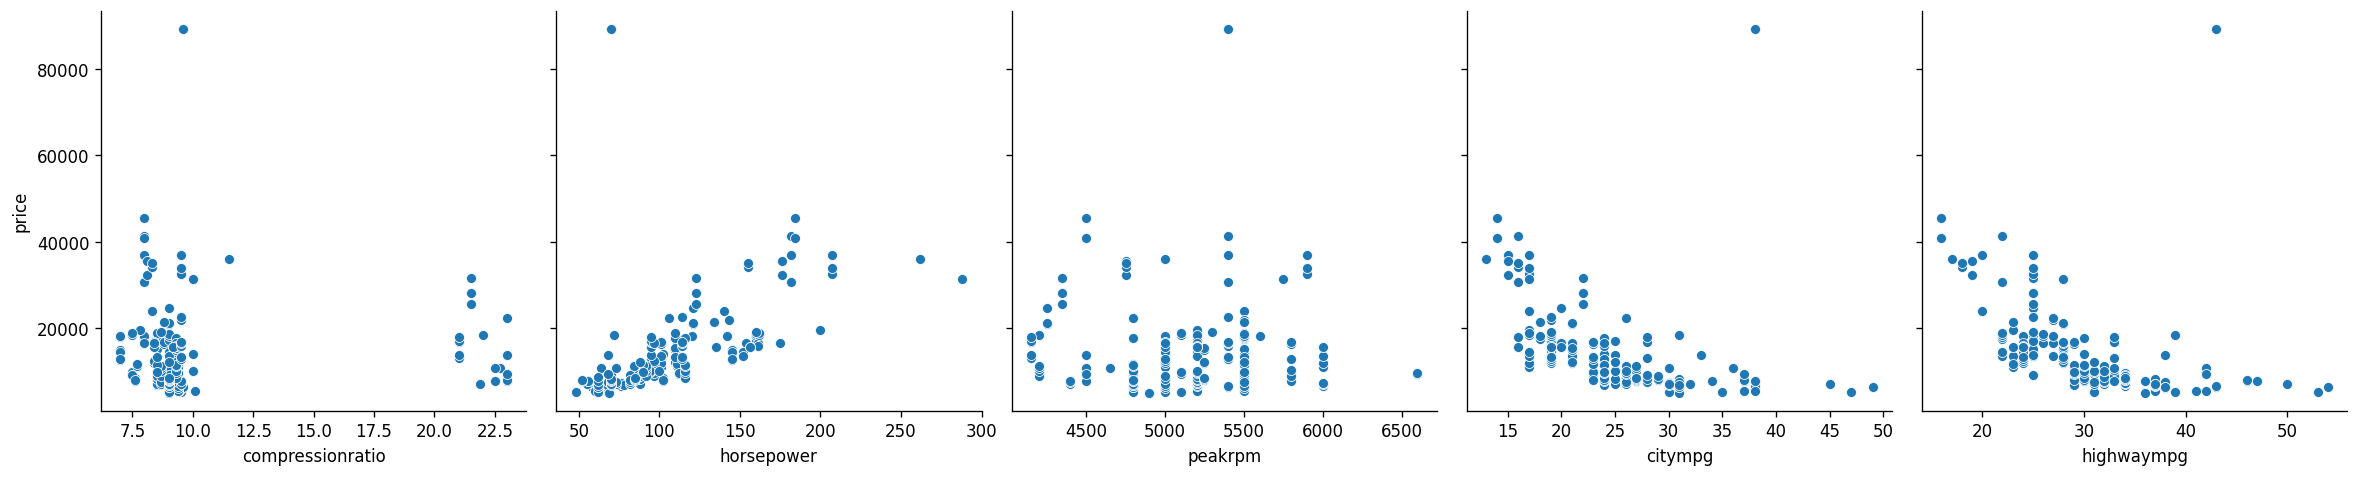

In [19]:
sns.pairplot(df, x_vars=['carlength','carwidth','carheight','curbweight'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()
sns.pairplot(df, x_vars=['wheelbase','enginesize','boreratio','stroke'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()
sns.pairplot(df, x_vars=['compressionratio','horsepower','peakrpm','citympg','highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

1. Curb weight, car length, car width, wheelbase, enginesize, boreratio, horsepower có tương quan dương với price
2. Car height, stroke, compressionratio, peakrpm không thấy sự tương quan rõ ràng.
3. citympg và highwaympg có tương quan âm với price